**Author: MANISH KUMAR**

In [2]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install xlsxwriter

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install bs4

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install requests

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import requests
import datetime
from bs4 import BeautifulSoup
def func(awb):
  url='http://www.shreetirupaticourier.net/frm_doctrackweb.aspx?docno='+str(awb)
  r = requests.get(url)
  df= BeautifulSoup(r.content, 'html.parser')
  status=str(df.find("span", { "id" : "lblStatus" }))
  booked=str(df.find("span", { "id" : "txtDate" }))
  flag=0
  book_date=""
  for i in range(len(booked)):
    if(booked[i]==' '):
      flag=0
    if flag==1:
      book_date=book_date+booked[i]
    if(booked[i]=='>'):
      flag=1
    

  ans=""
  last_update_date=""
  flag=1
  for i in range(65,1000):
    if(len(status)<=i or status[i]=='<'):
      break
    if(status[i]==' '):
      flag=0
    
    if(flag==1):
      ans=ans+status[i]

    if(status[i-6:i]=="Dated "):
      flag=2
    if(flag==2):
      last_update_date=last_update_date+status[i]
      

  if(ans==""):
    ans="Invalid"
    book_date="00-00-0000"
    last_update_date="00-00-0000"
  elif(ans=="Delivery" or ans=="Delivered" or ans=="Out" or ans=="Received"):
    ans="Delivered"

  if(book_date==""):
    book_date="00-00-0000"
  if(last_update_date==""):
    last_update_date="00-00-0000"
  return [ans,book_date,last_update_date]

# testing of function
func(120200218978)
func(120200415517)


['Delivered', '29-02-24', '08-03-24']

In [9]:
awbList = []
import pandas as pd
df = pd.read_excel('input.xlsx')
# print(df)
print(type(df))
df=df.iloc[:, 0]
for id in df:
    awbList.append(id)



<class 'pandas.core.frame.DataFrame'>


In [10]:
status=[]
book_date=[]
last_update_date=[]
for awb in awbList:
  x=func(awb)
  status.append(x[0])
  book_date.append(x[1])
  last_update_date.append(x[2])


In [11]:
record=pd.DataFrame({"AWB Number":awbList ,
                     'Parcel Status': status,
                     'Book Date':book_date,
                     'Last Update Date':last_update_date
                     })
record['AWB Number'] = record['AWB Number'].astype(str)


In [12]:
record       

,AWB Number,Parcel Status,Book Date,Last Update Date
0,120200414845,Delivered,01-02-24,06-02-24
1,120200414846,Delivered,01-02-24,05-02-24
2,120200414847,Booked,01-02-24,01-02-2024
3,120200414848,Delivered,01-02-24,03-02-24
4,120200414849,Delivered,01-02-24,05-02-24
...,...,...,...,...
671,120200415516,Delivered,29-02-24,00-00-0000
672,120200415517,Delivered,29-02-24,08-03-24
673,120200415518,Booked,29-02-24,29-02-2024
674,120200415519,Delivered,29-02-24,09-03-24


In [13]:
company_name="Shipping_Company : Shree Tirupati Courier Service PVT.LTD"
date="Date : "+str(datetime.datetime.now())
MetaData=pd.DataFrame({company_name, date})

grouped = record.groupby('Parcel Status')
print(len(grouped))
grouped=grouped.count()
grouped=(grouped.iloc[:, [0]])
for i in grouped.iloc[:,[0]]:
    print(i)
grouped

4
AWB Number


,AWB Number
Parcel Status,
Booked,94
Delivered,516
Invalid,1
Return,65


In [14]:
class Date:
	def __init__(self, d, m, y):
		self.d = d
		self.m = m
		self.y = y


# To store number of days in all months from
# January to Dec.
monthDays = [31, 28, 31, 30, 31, 30,
			31, 31, 30, 31, 30, 31]

# This function counts number of leap years
# before the given date


def countLeapYears(d):

	years = d.y

	# Check if the current year needs to be considered
	# for the count of leap years or not
	if (d.m <= 2):
		years -= 1

	# An year is a leap year if it is a multiple of 4,
	# multiple of 400 and not a multiple of 100.
	return int(years / 4) - int(years / 100) + int(years / 400)


# This function returns number of days between two
# given dates
def getDifference(dt1, dt2):

	# COUNT TOTAL NUMBER OF DAYS BEFORE FIRST DATE 'dt1'

	# initialize count using years and day
	n1 = dt1.y * 365 + dt1.d

	# Add days for months in given date
	for i in range(0, dt1.m - 1):
		n1 += monthDays[i]

	# Since every leap year is of 366 days,
	# Add a day for every leap year
	n1 += countLeapYears(dt1)

	# SIMILARLY, COUNT TOTAL NUMBER OF DAYS BEFORE 'dt2'

	n2 = dt2.y * 365 + dt2.d
	for i in range(0, dt2.m - 1):
		n2 += monthDays[i]
	n2 += countLeapYears(dt2)

	# return difference between two counts
	return (n2 - n1)


# testing
dt1 = Date(13, 12, 2018)
dt2 = Date(25, 2, 2019)

print(getDifference(dt1, dt2), "days")


74 days


In [28]:
writer = pd.ExcelWriter('output.xlsx', engine='xlsxwriter')
# record.to_excel(writer, sheet_name='Sheet1', startrow=1, header=False, index=False)
MetaData.to_excel(writer, sheet_name='Sheet1', startrow=1, startcol=1, header=False, index=False)
col=0



In [29]:
iter=0
temp=pd.DataFrame
label=[]
value=[]

    
   

for i,j in grouped.iterrows():
    awblist=record.groupby('Parcel Status')['AWB Number'].apply(list)[iter]
    bookdate=record.groupby('Parcel Status')['Book Date'].apply(list)[iter]
    last_update_date=record.groupby('Parcel Status')['Last Update Date'].apply(list)[iter]
    days=[]
    
    for ptr in range(0,len(awblist)):
        dt1=book_date[ptr]
        dt2=last_update_date[ptr]
        d="NA"
        try:
            dt1=dt1.split('-')
            dt2=dt2.split('-')
            if(awblist[ptr]=="120200415518"):
                print(dt1," ",dt2)
            dt1 = Date(int(dt1[0]), int(dt1[1]),2000+ (int(dt1[2]))%100)
            dt2 = Date(int(dt2[0]), int(dt2[1]), 2000+ (int(dt2[2]))%100)
            gap=getDifference(dt1, dt2)
            if gap>=0:
                d=gap
        except:
            d="NA"

        days.append(d)


        
  

    title=pd.DataFrame({i})
    label.append(i)
    value.append(len(awblist))

    title.to_excel(writer, sheet_name='Sheet1', startrow=4, startcol=col, header=False, index=False)


    temp=pd.DataFrame({"AWB Number":awblist ,
                     'Book Date':bookdate,
                     'Last Update Date':last_update_date,
                    "Days":days

                     })
    temp.to_excel(writer, sheet_name='Sheet1', startrow=5, startcol=col, header=True, index=False)
    iter=iter+1
    col=col+5
# writer.close()


['08', '02', '24']   ['29', '02', '2024']


In [30]:
# Data 
data = {
    'Status':label,
    'Count': value
}
ct=len(label)
df = pd.DataFrame(data)
title="Summary"
title=pd.DataFrame({title})
title.to_excel(writer, sheet_name='Sheet1', startrow=4, startcol=col, header=False, index=False)
df.to_excel(writer, sheet_name='Sheet1', startrow=5, startcol=col , header=True, index=False)


writer.close()


In [35]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.chart import PieChart, Reference
from openpyxl.chart.label import DataLabelList
# Load the existing workbook and the sheet where you want to append the chart
book = load_workbook('output.xlsx')
sheet = book['Sheet1']

# Data 
data = {
    'Status':label,
    'Count': value
}
ct=len(label)
# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Find the last row in the worksheet
last_row = sheet.max_row+1
print(last_row)

# Append the data starting from the last row + 1 (to avoid overwriting)
# sheet.append("Summary")
# for index, row in df.iterrows():
#     sheet.append(row.values.tolist())
#     print(row.values.tolist())


    

# Create a pie chart with the new data
chart = PieChart()
chart.title = "Shipment Status Chart"
labels = Reference(sheet, min_col=col+1, min_row=7, max_row=7+len(df))
data = Reference(sheet, min_col=col+2, min_row=6, max_row=6+len(df))
chart.add_data(data, titles_from_data=True)
chart.set_categories(labels)
print(data)
print(type(data))
print(labels)
print(type(labels))



# Style the data labels
data_labels = DataLabelList()
data_labels.showVal = True  # Show the value for each slice
data_labels.showPercent = True  # Show the percentage for each slice
chart.dataLabels = data_labels

# Place the chart on the sheet
sheet.add_chart(chart, 'U13')

# Save the workbook
book.save('output.xlsx')


523
'Sheet1'!$V$6:$V$10
<class 'openpyxl.chart.reference.Reference'>
'Sheet1'!$U$7:$U$11
<class 'openpyxl.chart.reference.Reference'>


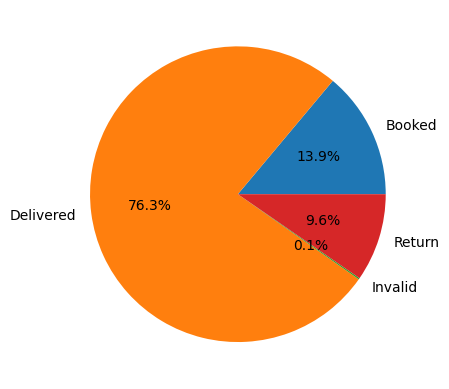

In [21]:
import matplotlib.pyplot as plt
# Plot
plt.pie(value, labels=label, autopct='%1.1f%%')

# Display the pie chart
plt.show()